In [1]:
# import needed packages
import osmnx as ox
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

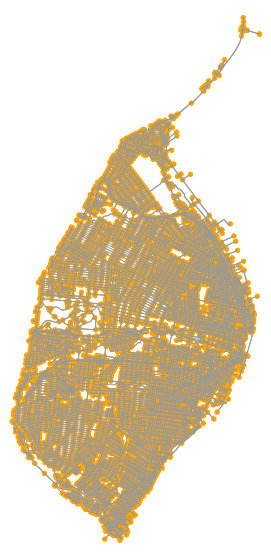

(<Figure size 331.962x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x128bfbb00>)

In [2]:
# pull St. Louis City's driveable street grid

G = ox.graph_from_place('St. Louis, Missouri, USA', network_type='drive')
G_proj = ox.project_graph(G)
ox.plot_graph(G_proj, fig_height=10, node_color='orange', node_size=30)


In [3]:
# clean up the intersections and extract their xy coords
intersections = ox.clean_intersections(G_proj, tolerance=15, dead_ends=False)
points = np.array([point.xy for point in intersections])

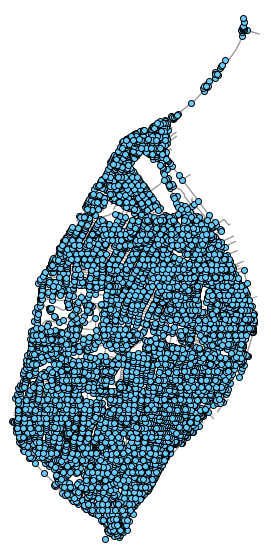

In [4]:
# plot the cleaned-up intersections
fig, ax = ox.plot_graph(G_proj, fig_height=10, show=False, close=False, node_alpha=0)
ax.scatter(x=points[:,0], y=points[:,1], zorder=2, color='#66ccff', edgecolors='k')
plt.show()

In [5]:
# Convert geoseries of intersections to geodataframe and then re-project it from meters into lat-long
gdf = gpd.GeoDataFrame(geometry=intersections)
gdf.crs = G_proj.graph['crs']
ox.project_gdf(gdf, to_latlong=True)

In [8]:
gdf.crs

{'datum': 'WGS84', 'ellps': 'WGS84', 'proj': 'utm', 'zone': 15, 'units': 'm'}

In [56]:
intersections.crs = {'init' : 'epsg:6512'}

print(intersections.crs)

{'init': 'epsg:6512'}


In [9]:
gdf.to_file("intersections.shp")
